# **Mini Project 3 - Network Analysis**

In this project, network analysis will be performed on twitter data related to gender debate.

**Note:** The notebook takes approximately 2.5 minutes to execute.

## **Part 1 - Data Collection**
A library called snscrape is used to fetch data from twitter. 
The code is commented as the scraping will take time. The codes are only for demonstrating how was the data scraped.

**Setting up python3.8 and pip**


In [1]:
# !sudo apt install python3.8
# !sudo apt install python3.8-distutils

# !wget https://bootstrap.pypa.io/get-pip.py
# !sudo python3.8 get-pip.py

**Installing snscrape library**

In [2]:
# %pip install git+https://github.com/JustAnotherArchivist/snscrape.git

**Importing essential libraries**

In [3]:
import os
import pandas as pd
from datetime import date, datetime
import warnings
warnings.filterwarnings("ignore")

**Scraping data from twitter**

Scraping twitter data from 2020-01-01 to 2021-10-29 for hashtags 'heforshe', 'genderequality', 'empoweringwomen', 'womenempowerment', 'feminism', 'metoo', 'equalrights', 'womenrights', and 'generationequality'.

In [4]:
# # Initializing hashtags to scrape
# hashtags = ['heforshe', 'genderequality', 'empoweringwomen', 'womenempowerment', 'feminism', 'metoo', 'equalrights', 'womenrights', 'generationequality']

# # Preparing hashtags to be passed as CLI arguments
# hashtags = " OR ".join(hashtags)

# years = ['2014','2015','2016','2017','2018','2019','2020','2021']

# # Setting maximum number of tweets to scrape
# max_results = 20000

# # Scraping tweets through snscrape CLI
# for year in years:
#   from_date = year+"-01-01"
#   end_date = year+"-12-31"
#   scraped_tweets = 'snscrape --jsonl' + f" --max-results {max_results} --since {from_date} twitter-hashtag '{hashtags} until:{end_date}' > {year}_scraped.json"
#   os.system(scraped_tweets)
#   if os.stat(f"{year}_scraped.json").st_size == 0:
#     print('No Tweets found')
#   else:
#     print(f"done {year}")
#   # Copying the scraped data to google drive
#   os.system(f"cp {year}_scraped.json 'drive/My Drive/'")

## **Part 2 - Data Pre-processing**

**Reading scraped data from google drive**

Takes approx. 35 seconds.

In [5]:
# Fetching data for 2014 to 2021
urls = ['https://drive.google.com/file/d/1-C9mqmM9ZpKsewj80pVe_hd69ZPfUftC/view?usp=sharing',
        'https://drive.google.com/file/d/1-GclYTS-CjZVslzTP9mN-V1B0LWqCG0p/view?usp=sharing',
        'https://drive.google.com/file/d/1-8tKNg79dGzRAUHoOkOoDQm1SCVdJ1FX/view?usp=sharing',
        'https://drive.google.com/file/d/1ReP_xmTOnn3bEmC5yQS1s-bnXrALFv8q/view?usp=sharing',
        'https://drive.google.com/file/d/1-616pd6wDsTfNxX93Zf_KB-7JHV-G_z_/view?usp=sharing',
        'https://drive.google.com/file/d/1-5mVin7MxP8G01C1PpdQmtMk1f9Mt4uG/view?usp=sharing',
        'https://drive.google.com/file/d/1-09BBE2EeO1Wc3QiIpmxpkDGYrDUceaj/view?usp=sharing',
        'https://drive.google.com/file/d/1--336mEa0AJ89jrQldfKADIdtHras050/view?usp=sharing']

df = pd.DataFrame()
for url in urls:
  id = url.split('/')[-2]
  url1='https://drive.google.com/uc?id=' + id
  df = df.append(pd.read_json(url1, lines=True))

df.sample(10, random_state=10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
11695,snscrape.modules.twitter.Tweet,https://twitter.com/2COOLFOR_AC/status/8135686...,2016-12-27 02:14:08+00:00,origin of feminism &amp; how white feminists u...,origin of feminism &amp; how white feminists u...,813568617287516160,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,813568617287516160,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[https://twitter.com/rougedouxx/status/8135353...,[https://t.co/cUEpNjDgp4],None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,None,None
3394,snscrape.modules.twitter.Tweet,https://twitter.com/ZakAce/status/814596300347...,2016-12-29 22:17:47+00:00,@revresbo1 Feminism helps men as well #knownot...,@revresbo1 Feminism helps men as well #knownot...,814596300347846656,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,0,814578566390317056,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,None,None,None,NaN,None,8.145900e+17,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[knownothing],None
1990,snscrape.modules.twitter.Tweet,https://twitter.com/StablePlanetAll/status/145...,2021-10-29 15:32:55+00:00,Another inspiring story from our partners @Gir...,Another inspiring story from our partners @Gir...,1454108997221552134,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,4,5,0,1454108997221552134,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[https://twitter.com/GirlPlanetEarth/status/14...,[https://t.co/4pL7HkMrom],None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[empoweringwomen, COP26Summit, climatesolution...",None
16544,snscrape.modules.twitter.Tweet,https://twitter.com/Kory_Wise/status/134319481...,2020-12-27 13:59:32+00:00,@MrHandsome_ZA 1. Fvck feminism\n2. Influencin...,@MrHandsome_ZA 1. Fvck feminism\n2. Influencin...,1343194810430197760,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,1343172332882440192,tl,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,None,None,NaN,None,1.343172e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
3748,snscrape.modules.twitter.Tweet,https://twitter.com/Changers360/status/8145616...,2016-12-29 20:00:01+00:00,Afghanistan's first female pilot is seeking as...,Afghanistan's first female pilot is seeking as...,814561632223457280,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,814561632223457280,en,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,TweetDeck,[http://bit.ly/2ig0lgZ],[https://t.co/Z0wCF8er3n],"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,[genderequality],None
3646,snscrape.modules.twitter.Tweet,https://twitter.com/SPeK044/status/10793478074...,2018-12-30 12:05:45+00:00,全部読みたい。特に男性が書いた方面白そう！\n\nわかりあう努力って大切。「#MeToo」が...,全部読みたい。特に男性が書いた方面白そう！\n\nわかりあう努力って大切。「#MeToo」が...,1079347807406895105,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1079347807406895105,ja,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[https://www.buzzfeed.com/jp/akikokobayashi/me...,[https://t.co/J5wtKo6GcO],None,NaN,None,NaN,None,None,None,None,[MeToo],None
1357,snscrape.modules.twitter.Tweet,https://twitter.com/mehoyangle/status/12117132...,2019-12-30 18:18:48+00:00,It isn’t feminism if you refuse to

In [6]:
# resetting index and dropping index column
df.reset_index(inplace=True)
df.drop(labels=['index'], axis=1, inplace=True)

In [7]:
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/xoxo_marianna/status/55007...,2014-12-30 23:59:58+00:00,I don't want to judge another's feminism but I...,I don't want to judge another's feminism but I...,550078874537570305,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,1,0,550078874537570305,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,None,None,NaN,None,NaN,None,None,None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/metoo_22/status/5500788676...,2014-12-30 23:59:56+00:00,نمتو يادجاج 🏃.,نمتو يادجاج 🏃.,550078867600207872,"{'_type': 'snscrape.modules.twitter.User', 'us...",9,1,0,0,550078867600207872,ar,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,None,None,NaN,None,NaN,None,None,None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/katyrose__/status/55007879...,2014-12-30 23:59:40+00:00,Those against feminism clearly fear empowered ...,Those against feminism clearly fear empowered ...,550078798654615552,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,0,550078798654615552,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,None,None,NaN,None,NaN,None,None,None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/MariJessup/status/55007875...,2014-12-30 23:59:30+00:00,"@jopiazza - loved the article ""Why I bought my...","@jopiazza - loved the article ""Why I bought my...",550078759013867521,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,3,0,550078759013867521,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://twitter.com,Twitter Web Client,None,None,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Determined, romantic, empoweringwomen, dreamjob]",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/ScottyFoster_42/status/550...,2014-12-30 23:59:18+00:00,“@Athletic_Babes: I'm in love😍 | https://t.co/...,“@Athletic_Babes: I'm in love😍 | vine.co/v/O6D...,550078709328535552,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,544258349936553984,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[https://vine.co/v/O6DF7tbpXAA],[https://t.co/qDzKEKIW0W],None,NaN,None,5.442583e+17,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[metoo],None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,snscrape.modules.twitter.Tweet,https://twitter.com/natashablue22/status/14530...,2021-10-26 16:00:43+00:00,Thank you to @MSNBC for focusing on real voter...,Thank you to @MSNBC for focusing on real voter...,1453028828620656646,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,0,1453028828620656646,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,None,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[VotingRights, EqualRights]",None
159996,snscrape.modules.twitter.Tweet,https://twitter.com/Akkiestial/status/14530288...,2021-10-26 16:00:43+00:00,"""Feminism Against Fascism"" \n\nThat's it. That...","""Feminism Against Fascism"" \n\nThat's it. That...",1453028828087918597,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,3,27,0,1453028828087918597,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,None,None,None,NaN,None,NaN,

**Extracting required columns for analysis:**


In [8]:
# looking at the columns
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [9]:
# Extracting essential columns
extracted_df = df[['id', 'date', 'url', 'content', 'lang', 'user', 'replyCount', 'retweetCount', 'likeCount', 'inReplyToUser', 'mentionedUsers','place', 'hashtags']]
extracted_df

,id,date,url,content,lang,user,replyCount,retweetCount,likeCount,inReplyToUser,mentionedUsers,place,hashtags
0,550078874537570305,2014-12-30 23:59:58+00:00,https://twitter.com/xoxo_marianna/status/55007...,I don't want to judge another's feminism but I...,en,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,1,None,None,None,None
1,550078867600207872,2014-12-30 23:59:56+00:00,https://twitter.com/metoo_22/status/5500788676...,نمتو يادجاج 🏃.,ar,"{'_type': 'snscrape.modules.twitter.User', 'us...",9,1,0,None,None,None,None
2,550078798654615552,2014-12-30 23:59:40+00:00,https://twitter.com/katyrose__/status/55007879...,Those against feminism clearly fear empowered ...,en,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,None,None,None,None
3,550078759013867521,2014-12-30 23:59:30+00:00,https://twitter.com/MariJessup/status/55007875...,"@jopiazza - loved the article ""Why I bought my...",en,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,3,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[Determined, romantic, empoweringwomen, dreamjob]"
4,550078709328535552,2014-12-30 23:59:18+00:00,https://twitter.com/ScottyFoster_42/status/550...,“@Athletic_Babes: I'm in love😍 | https://t.co/...,en,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,[metoo]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,1453028828620656646,2021-10-26 16:00:43+00:00,https://twitter.com/natashablue22/status/14530...,Thank you to @MSNBC for focusing on real voter...,en,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[VotingRights, EqualRights]"
159996,1453028828087918597,2021-10-26 16:00:43+00:00,https://twitter.com/Akkiestial/status/14530288...,"""Feminism Against Fascism"" \n\nThat's it. That...",en,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,3,27,None,None,None,None
159997,1453028762669535241,2021-10-26 16:00:27+00:00,https://twitter.com/signsofhopelv/status/14530...,In the Philippines #MeToo goes by #ReseptoNama...,en,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,None,None,None,"[MeToo, ReseptoNaman, RespectMe]"
159998,1453028661179731975,2021-10-26 16:00:03+00:00,https://twitter.com/Sanctuary2016/status/14530...,"FREE, MONTHLY E-NEWSLETTER: Delivered the 1st ...",en,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,None,None,None,"[freenewsletter, WheresYourSanctuary, empoweri..."


In [10]:
# Extracting user from snscrape user object
extracted_df['username'] = extracted_df.user.map(lambda user: user['username'].lower())
extracted_df['userVerified'] = extracted_df.user.map(lambda user: user['verified'])
extracted_df['userFollowersCount'] = extracted_df.user.map(lambda user: user['followersCount'])
extracted_df.drop('user',axis=1, inplace=True)

# Extracting country from snscrape place object
extracted_df['country'] = extracted_df.place.map(lambda place: place['country'].lower(), "ignore")
extracted_df.drop('place',axis=1, inplace=True)

# Extracting inReplyToUser and mentioned users
extracted_df['inReplyToUser'] = extracted_df.inReplyToUser.map(lambda user: user['username'].lower(), "ignore")
extracted_df['mentionedUsers'] = extracted_df.mentionedUsers.map(lambda users: [user['username'].lower() for user in users], "ignore")

# Extracting date string from date
extracted_df['year'] = extracted_df.date.map(lambda date: date.strftime('%Y'))
extracted_df.drop('date',axis=1, inplace=True)

extracted_df.sample(10, random_state=10)


,id,url,content,lang,replyCount,retweetCount,likeCount,inReplyToUser,mentionedUsers,hashtags,username,userVerified,userFollowersCount,country,year
51695,813568617287516160,https://twitter.com/2COOLFOR_AC/status/8135686...,origin of feminism &amp; how white feminists u...,en,0,0,1,None,None,None,2coolfor_ac,False,371,None,2016
43394,814596300347846656,https://twitter.com/ZakAce/status/814596300347...,@revresbo1 Feminism helps men as well #knownot...,en,1,0,0,revresbo1,[revresbo1],[knownothing],zakace,False,75,None,2016
141990,1454108997221552134,https://twitter.com/StablePlanetAll/status/145...,Another inspiring story from our partners @Gir...,en,0,4,5,None,[girlplanetearth],"[empoweringwomen, COP26Summit, climatesolution...",stableplanetall,False,37,None,2021
136544,1343194810430197760,https://twitter.com/Kory_Wise/status/134319481...,@MrHandsome_ZA 1. Fvck feminism\n2. Influencin...,tl,0,0,1,billdoregold,[mrhandsome_za],None,kory_wise,False,14689,None,2020
43748,814561632223457280,https://twitter.com/Changers360/status/8145616...,Afghanistan's first female pilot is seeking as...,en,0,0,1,None,None,[genderequality],changers360,False,167,None,2016
83646,1079347807406895105,https://twitter.com/SPeK044/status/10793478074...,全部読みたい。特に男性が書いた方面白そう！\n\nわかりあう努力って大切。「#MeToo」が...,ja,0,0,0,None,None,[MeToo],spek044,False,65,None,2018
101357,1211713262305329152,https://twitter.com/mehoyangle/status/12117132...,It isn’t feminism if you refuse to believe tha...,en,1,0,1,None,None,None,mehoyangle,False,29,None,2019
103164,1211615508249882625,https://twitter.com/safiya_ari/status/12116155...,"Please even though men are somehow and all, it...",en,2,0,6,None,None,None,safiya_ari,False,1108,None,2019
34622,680858781920657408,https://twitter.com/grunjh/status/680858781920...,@LeviiCorrales @lexi4prez what abt feminism cr...,en,0,0,0,leviicorrales,"[leviicorrales, lexi4prez]",None,grunjh,False,4305,None,2015
50162,813807847603437568,https://twitter.com/fleurchild/status/81380784...,"Carrie Fisher: A Few Words on Princess Leia, F...",en,0,0,2,None,[rollingstone],None,fleurchild,False,3958,None,2016


**Extracting tweets having country description and english language for simplicity**

In [11]:
eng_df = extracted_df[(extracted_df['lang']=='en') & (extracted_df['country'])].drop('lang', axis=1)
eng_df.reset_index(inplace=True)
eng_df.drop('index', axis=1, inplace=True)

eng_df

,id,url,content,replyCount,retweetCount,likeCount,inReplyToUser,mentionedUsers,hashtags,username,userVerified,userFollowersCount,country,year
0,550077471039565825,https://twitter.com/cleo_straw/status/55007747...,@thatjaycijo 😍😍😍 Reverse feminism for the win.,1,0,3,thatjaycijo,[thatjaycijo],None,cleo_straw,False,474,united states,2014
1,550074201663868929,https://twitter.com/MattChisling/status/550074...,@KristinJLieb Another actress causing a big ba...,0,0,0,None,[kristinjlieb],None,mattchisling,False,1120,united kingdom,2014
2,550072734412062721,https://twitter.com/sydneyaparker/status/55007...,Feminism claimed me before I claimed it,0,0,0,None,None,None,sydneyaparker,False,721,united states,2014
3,550070863782232065,https://twitter.com/mhairihamilton/status/5500...,actually stop with ur feminism pish,0,0,3,None,None,None,mhairihamilton,False,660,united kingdom,2014
4,550067025653948416,https://twitter.com/BougieBlackGurl/status/550...,@SemiCartamatic I tried to explain even when s...,1,0,0,semicartamatik,[semicartamatic],None,bougieblackgurl,False,18453,united states,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,1453032424087097348,https://twitter.com/judeeferguson/status/14530...,Can’t wait for the launch! The culmination of ...,0,0,4,None,"[trainingswa, bailliegifford, eacequalities, e...","[GenderEquality, goodforbusiness, vawg]",judeeferguson,False,209,united kingdom,2021
3532,1453031941888950272,https://twitter.com/RaiseUpfor15/status/145303...,.@McDonalds STILL refuses to take responsibili...,2,0,0,raiseupfor15,[mcdonalds],"[metoo, Fightfor15]",raiseupfor15,False,11245,united states,2021
3533,1453029908494622731,https://twitter.com/RaiseUpfor15/status/145302...,BREAKING: @McDonalds workers just walked off t...,2,46,78,None,[mcdonalds],"[Fightfor15, Striketober, metoo]",raiseupfor15,False,11245,united states,2021
3534,1453029113120366597,https://twitter.com/LOlvhoj/status/14530291131...,@Rubytussin1 The hate is off the scale for sur...,1,0,1,rubytussin1,[rubytussin1],None,lolvhoj,False,653,united kingdom,2021


**Cleaning hashtags, user mentions, and URLs from the tweet content**

In [12]:
import re
eng_df['content'] = eng_df['content'].map(lambda content: re.sub(r'^https?:\/\/.*[\r\n]*', '', content, flags=re.MULTILINE))
eng_df['content'] = eng_df['content'].map(lambda content: re.sub("@[A-Za-z0-9_]+", '', content, flags=re.MULTILINE))
eng_df['content'] = eng_df['content'].map(lambda content: re.sub("#[A-Za-z0-9_]+", '', content, flags=re.MULTILINE))


**Classifying the country as developed and developing.** 

Note: For simplicity, countries having Human Development Index (HDI) above 0.8 is classified as developed and rest are classified as developing.

In [13]:
developed = ['andorra', 'argentina', 'australia', 'austria', 'bahamas', 'bahrain', 'barbados', 'belarus', 'belgium', 'bermuda', 'bulgaria', 'canada', 'chile', 'costa rica', 'croatia', 'cyprus', 'czech republic', 'denmark', 'estonia', 'finland', 'france', 'georgia', 'germany', 'greece', 'hong kong', 'hungary', 'iceland', 'ireland', 'israel', 'italy', 'japan', 'kazakhstan', 'kingdom of saudi arabia', 'kuwait', 'latvia', 'liechtenstein', 'lithuania', 'luxembourg', 'malaysia', 'malta', 'mauritius', 'montenegro', 'new zealand', 'north korea', 'norway', 'oman', 'palau', 'panama', 'poland', 'portugal', 'qatar', 'republic of korea', 'republic of serbia', 'republic of the philippines', 'romania', 'russia', 'saudi arabia', 'singapore', 'slovakia', 'slovenia', 'spain', 'sweden', 'switzerland', 'taiwan', 'the netherlands', 'turkey', 'united arab emirates', 'united kingdom', 'united states', 'uruguay']
developing = ['afghanistan', 'albania', 'algeria', 'angola', 'antigua and barbuda', 'armenia', 'azerbaijan', 'bangladesh', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'burkina faso', 'burundi', 'cambodia', 'cameroon', 'central african republic', 'chad', 'colombia', 'comoros', 'cuba', 'democratic republic of congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'equatorial guinea', 'eritrea', 'eswatini', 'ethiopia', 'fiji', 'gabon', 'gambia', 'ghana', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'hashemite kingdom of jordan', 'honduras', 'india', 'indonesia', 'iran', 'iraq', 'ivory coast', 'jamaica', 'kenya', 'kiribati', 'kyrgyzstan', 'laos', 'lebanon', 'lesotho', 'liberia', 'libya', 'madagascar', 'malawi', 'maldives', 'mali', 'marshall islands', 'mauritania', 'mexico', 'micronesia', 'moldova', 'mongolia', 'morocco', 'mozambique', 'myanmar', 'namibia', 'nepal', 'nicaragua', 'niger', 'nigeria', 'north macedonia', 'pakistan', 'palestine', 'papua new guinea', 'paraguay', "people's republic of china", 'peru', 'philippines', 'republic of the congo', 'rwanda', 'saint kitts and nevis', 'saint lucia', 'saint vincent and the grenadines', 'samoa', 'sao tome and principe', 'senegal', 'seychelles', 'sierra leone', 'solomon islands', 'south africa', 'south sudan', 'sri lanka', 'sudan', 'suriname', 'swaziland', 'syria', 'tajikistan', 'tanzania', 'thailand', 'timor-leste', 'togo', 'tonga', 'trinidad and tobago', 'tunisia', 'turkmenistan', 'uganda', 'ukraine', 'uzbekistan', 'vanuatu', 'venezuela', 'vietnam', 'yemen', 'zambia', 'zimbabwe']

eng_df['country_class'] = eng_df['country'].map(lambda country: "developed" if country in developed else "developing")


## **Part 3 - Exploratory Data Analysis**

In [14]:
# importing libraries
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [15]:
eng_df

,id,url,content,replyCount,retweetCount,likeCount,inReplyToUser,mentionedUsers,hashtags,username,userVerified,userFollowersCount,country,year,country_class
0,550077471039565825,https://twitter.com/cleo_straw/status/55007747...,😍😍😍 Reverse feminism for the win.,1,0,3,thatjaycijo,[thatjaycijo],None,cleo_straw,False,474,united states,2014,developed
1,550074201663868929,https://twitter.com/MattChisling/status/550074...,Another actress causing a big bang over her v...,0,0,0,None,[kristinjlieb],None,mattchisling,False,1120,united kingdom,2014,developed
2,550072734412062721,https://twitter.com/sydneyaparker/status/55007...,Feminism claimed me before I claimed it,0,0,0,None,None,None,sydneyaparker,False,721,united states,2014,developed
3,550070863782232065,https://twitter.com/mhairihamilton/status/5500...,actually stop with ur feminism pish,0,0,3,None,None,None,mhairihamilton,False,660,united kingdom,2014,developed
4,550067025653948416,https://twitter.com/BougieBlackGurl/status/550...,I tried to explain even when she said this on...,1,0,0,semicartamatik,[semicartamatic],None,bougieblackgurl,False,18453,united states,2014,developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,1453032424087097348,https://twitter.com/judeeferguson/status/14530...,Can’t wait for the launch! The culmination of ...,0,0,4,None,"[trainingswa, bailliegifford, eacequalities, e...","[GenderEquality, goodforbusiness, vawg]",judeeferguson,False,209,united kingdom,2021,developed
3532,1453031941888950272,https://twitter.com/RaiseUpfor15/status/145303...,. STILL refuses to take responsibility for the...,2,0,0,raiseupfor15,[mcdonalds],"[metoo, Fightfor15]",raiseupfor15,False,11245,united states,2021,developed
3533,1453029908494622731,https://twitter.com/RaiseUpfor15/status/145302...,BREAKING: workers just walked off the job ON ...,2,46,78,None,[mcdonalds],"[Fightfor15, Striketober, metoo]",raiseupfor15,False,11245,united states,2021,developed
3534,1453029113120366597,https://twitter.com/LOlvhoj/status/14530291131...,The hate is off the scale for sure. \nI’m a c...,1,0,1,rubytussin1,[rubytussin1],None,lolvhoj,False,653,united kingdom,2021,developed


In [16]:
# Looking at the size of the dataframe
eng_df.shape

(3536, 15)

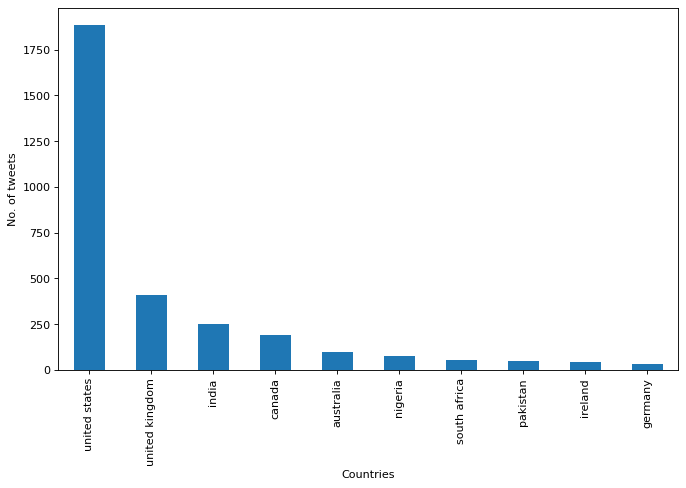

In [17]:
figure(figsize=(10, 6), dpi=80)

# plotting no. of tweets based on countries
ax = eng_df.country.value_counts()[:10].plot(kind="bar")
ax.set_ylabel("No. of tweets")
ax.set_xlabel("Countries");

As we filtered the tweets with english language, undoubtedly USA has the highest number of tweets.



---



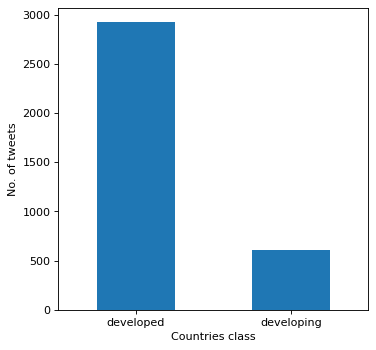

In [18]:
# plotting no. of tweets based on countries class
figure(figsize=(5, 5), dpi=80)
ax = eng_df.country_class.value_counts().plot(kind="bar", rot=0)
ax.set_ylabel("No. of tweets")
ax.set_xlabel("Countries class");

The dataset is imbalanced between tweets from developed and developing nations. Mainly because we filtered the dataset based on english language and most country speaking english happen to be developed.



---



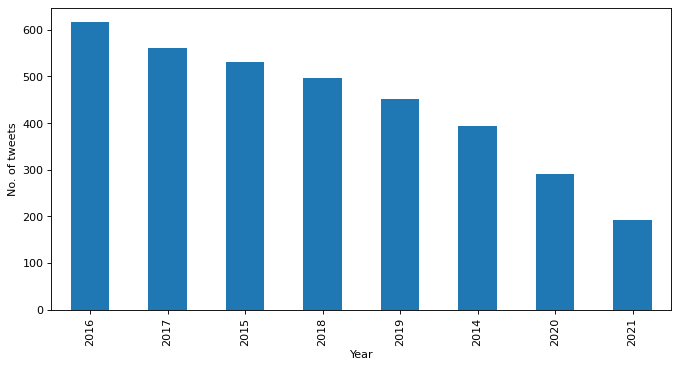

In [19]:
# No. of tweets by year
figure(figsize=(10, 5), dpi=80)
ax = eng_df.year.value_counts().plot(kind="bar")
ax.set_ylabel("No. of tweets")
ax.set_xlabel("Year");

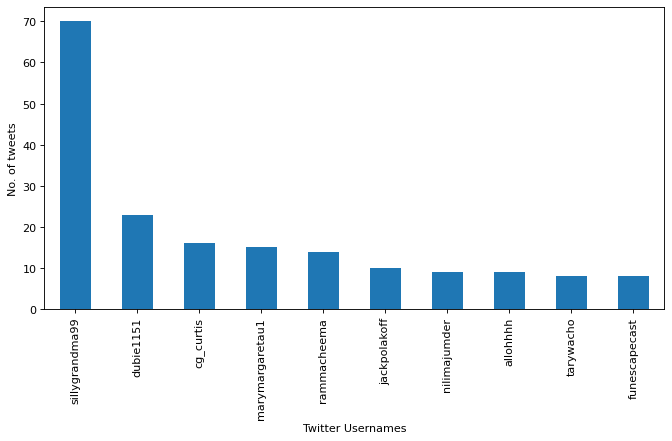

In [20]:
# Number of tweets by users

figure(figsize=(10, 5), dpi=80)
import numpy as np
ax = eng_df.username.value_counts()[:10].plot(kind="bar")

ax.set_ylabel("No. of tweets")
ax.set_xlabel("Twitter Usernames");

**Hypothesis:** These accounts are the potential influencers in our dataset relating to gender debate.

In [21]:
# Number of unique verified accounts that tweeted
len(eng_df[eng_df['userVerified']]['username'].unique())

117

**Hypothesis:** These 117 accounts and are potentially important in the network.



---



## **Part 4 - NLP**

In [22]:
# Importing Natural Language Toolkit Library
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

# Installing Contractions Libirary
!pip install contractions
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
     |████████████████████████████████| 284 kB 42.7 MB/s 
     |████████████████████████████████| 321 kB 42.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85441 sha256=d97aa7e4fc2f6c36f06802b4c34be304390ea6055656cd7a99df93ea1f5c40fa
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


Cleaning and tokenization:

In [23]:
import regex

# extracting required columns for NLP analysis
tweet_content = eng_df.loc[:,['username','content','country_class']]

# mapping contraction
tweet_content['content_tokens'] = tweet_content['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
tweet_content['content'] = [''.join(map(str, word)) for word in tweet_content['content']]

# lowercasing and cleaning noise
tweet_content['content'] = tweet_content['content'].str.lower()
tweet_content['content'] = tweet_content['content'].apply(lambda x: regex.sub(r'[^\w\d\s\']+', '', x))

# tokenization
tweet_content['tokenized_content'] = tweet_content['content'].apply(word_tokenize)

tweet_content.sample(10, random_state=10)

,username,content,country_class,content_tokens,tokenized_content
3444,sprntgstilettos,for me it was losing my self in playing the g...,developed,"[For, me,, it, was, losing, my, self, in, play...","[for, me, it, was, losing, my, self, in, playi..."
176,7vnsies,10 what is feminism females wanting equality,developed,"[“:, 10., what, is, feminism?”, females, wanti...","[10, what, is, feminism, females, wanting, equ..."
1799,laurawilsonhun1,another sign of how mentally ill donski is he ...,developed,"[Another, sign, of, how, mentally, ill, Donski...","[another, sign, of, how, mentally, ill, donski..."
1126,biafeminist,some1 asked professor y female singers embrac...,developed,"[some1, asked, professor, y, female, singers, ...","[some1, asked, professor, y, female, singers, ..."
736,klayleee,not like feminism the religion ok,developed,"[""not, like, feminism, the, religion"", ok]","[not, like, feminism, the, religion, ok]"
1456,robo_munk,a about animal human hybrids revolution and ...,developed,"[A, about, ,, animal, human, hybrids,, revolut...","[a, about, animal, human, hybrids, revolution,..."
1231,stephbowers,princess leia is dead and trump is the preside...,developed,"[Princess, Leia, is, dead, and, Trump, is, the...","[princess, leia, is, dead, and, trump, is, the..."
1680,cllrscottarthur,as the year draws to a close but the problem...,developed,"[As, the, year, draws, to, a, close, (but, the...","[as, the, year, draws, to, a, close, but, the,..."
831,mikelm31,me too brother httpstcor4fa4rioze,developed,"[Me, too, BROTHER, !, #!, https://t.co/R4Fa4rI...","[me, too, brother, httpstcor4fa4rioze]"
841,wkameipng,the fact that i misinterpreted a woman's feeli...,developed,"[The, fact, that, I, misinterpreted, a, woman'...","[the, fact, that, i, misinterpreted, a, woman,..."


Removing stopwords:

In [24]:
# importing stopword library and initializing
nltk.download('stopwords')
from nltk.corpus import stopwords

# adding custom stopwords that are obvious and that don't tell us much about the data content
custom_words = ["n't","amp",'feminism','gender','girls','guy', 'men','women','say','many','thank','even','man','thing','let','look', 'woman','people','year','one','need','see','make','know','good','feminist','male','still', 'right','time','really','things','rights','metoo','take','said','go','got','day','equality','think','made','girl','much','im','want','re','dont','female','feminists','love']

# adding to stopwords
my_stopwords = set(stopwords.words('english') + custom_words)

# removing stopwords
tweet_content['tokenized_content'] = tweet_content['tokenized_content'].apply(lambda x: [word for word in x if word not in my_stopwords])
tweet_content['joined_tokenized_content'] = [' '.join(map(str, word)) for word in tweet_content['tokenized_content']]

tweet_content.sample(10, random_state=10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,username,content,country_class,content_tokens,tokenized_content,joined_tokenized_content
3444,sprntgstilettos,for me it was losing my self in playing the g...,developed,"[For, me,, it, was, losing, my, self, in, play...","[losing, self, playing, game, figured, early, ...",losing self playing game figured early side op...
176,7vnsies,10 what is feminism females wanting equality,developed,"[“:, 10., what, is, feminism?”, females, wanti...","[10, females, wanting]",10 females wanting
1799,laurawilsonhun1,another sign of how mentally ill donski is he ...,developed,"[Another, sign, of, how, mentally, ill, Donski...","[another, sign, mentally, ill, donski, wishes,...",another sign mentally ill donski wishes could ...
1126,biafeminist,some1 asked professor y female singers embrac...,developed,"[some1, asked, professor, y, female, singers, ...","[some1, asked, professor, singers, embraced, s...",some1 asked professor singers embraced sexuali...
736,klayleee,not like feminism the religion ok,developed,"[""not, like, feminism, the, religion"", ok]","[like, religion, ok]",like religion ok
1456,robo_munk,a about animal human hybrids revolution and ...,developed,"[A, about, ,, animal, human, hybrids,, revolut...","[animal, human, hybrids, revolution, gorgeous,...",animal human hybrids revolution gorgeous art '...
1231,stephbowers,princess leia is dead and trump is the preside...,developed,"[Princess, Leia, is, dead, and, Trump, is, the...","[princess, leia, dead, trump, president, taken...",princess leia dead trump president taken serio...
1680,cllrscottarthur,as the year draws to a close but the problem...,developed,"[As, the, year, draws, to, a, close, (but, the...","[draws, close, problem, 's, hope, 2018, use, d...",draws close problem 's hope 2018 use degrading...
831,mikelm31,me too brother httpstcor4fa4rioze,developed,"[Me, too, BROTHER, !, #!, https://t.co/R4Fa4rI...","[brother, httpstcor4fa4rioze]",brother httpstcor4fa4rioze
841,wkameipng,the fact that i misinterpreted a woman's feeli...,developed,"[The, fact, that, I, misinterpreted, a, woman'...","[fact, misinterpreted, 's, feelings, apologized]",fact misinterpreted 's feelings apologized


Generating wordcloud:

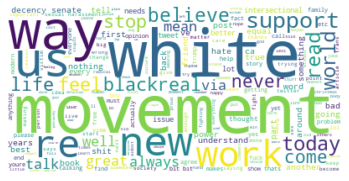

In [25]:
from wordcloud import WordCloud


developed_df = tweet_content[tweet_content['country_class']=='developed']
developing_df = tweet_content[tweet_content['country_class']=='developing']

# word cloud for developed nations
wc = WordCloud(background_color="white", random_state=10)

wordcloud_2019 = wc.generate(' '.join(developed_df['joined_tokenized_content'].apply(str)))
plt.imshow(wordcloud_2019, interpolation='bilinear')

plt.axis('off')
plt.show()

As we can see, the discussions are mostly about feminism movement, gender issues regarding race, work etc. in the developed nations.

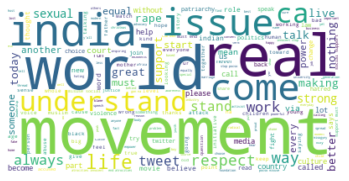

In [26]:
# word cloud for developing nations
wc = WordCloud(background_color="white", random_state=10)

wordcloud_2019 = wc.generate(' '.join(developing_df['joined_tokenized_content'].apply(str)))
plt.imshow(wordcloud_2019, interpolation='bilinear')

plt.axis('off')
plt.show()

In developing nations, feminism movement is also prominent but I has some discussion about even serious topics such as sexual violence and rape.



---



Vectorizing:

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizing for developed countries
vectorizer1 = TfidfVectorizer(max_features=1000)
text_developed = developed_df['joined_tokenized_content'].values
vectorized_developed = vectorizer1.fit_transform(text_developed)
word_features_developed = vectorizer1.get_feature_names()

# vectorizing for developing countries
vectorizer2 = TfidfVectorizer(max_features=1000)
text_developing = developing_df['joined_tokenized_content'].values
vectorized_developing = vectorizer2.fit_transform(text_developing)
word_features_developing = vectorizer2.get_feature_names()


Performing clustering to find various discussion topics:

In [28]:
from sklearn.cluster import KMeans

# K-means is used to divide a dataset into various clusters, with different cluster sizes being tested.
cluster = [3,4,5,6,8,10,13,15]

print('Clustering tweets from developed countries:')
for size in cluster :
    kmeans = KMeans(n_clusters = size, n_jobs = -1, random_state = 20)
    kmeans.fit(vectorized_developed)
    print("Cluster Size:", size)
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(word_features_developed[word] for word in centroid))
    new_col_name = str(size) + "_clusters"
    developed_df[new_col_name] = kmeans.labels_

print('------------------------------------------------------------------------------------------')

print('Clustering tweets from developing countries:')
for size in cluster :
    kmeans = KMeans(n_clusters = size, n_jobs = -1, random_state = 20)
    kmeans.fit(vectorized_developing)
    print("Cluster Size", size)
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(word_features_developing[word] for word in centroid))
    new_col_name = str(size) + "_clusters"
    developing_df[new_col_name] = kmeans.labels_

Clustering tweets from developed countries:
Cluster Size: 3
0 : would, us, new, decency, get, senate, way, support, read, via
1 : movement, re, sexual, universities, face, going, harassment, culture, talk, get
2 : like, white, looks, would, feel, nothing, get, also, way, believe
Cluster Size: 4
0 : would, us, new, get, way, support, via, great, work, real
1 : movement, re, sexual, universities, face, going, harassment, culture, talk, get
2 : like, white, looks, would, feel, nothing, get, also, way, believe
3 : decency, senate, restore, compassion, 2020, trump, respect, denounce, lies, gullible
Cluster Size: 5
0 : movement, would, us, re, get, new, support, way, sexual, via
1 : bit, periods, different, set, start, queen, little, fair, fake, find
2 : white, black, opinion, racist, amongst, like, privilege, film, twitter, could
3 : like, looks, feel, would, nothing, get, also, believe, way, us
4 : decency, senate, restore, compassion, 2020, trump, respect, denounce, lies, gullible
Cluster

Code below is commented as it was used for inspecting different clusters. Kept for demonstration purpose.

In [29]:
# # Inspecting various clusters
# cluster_name = '5_clusters';
# cluster_number = 4

# # Show cluster contents
# for index in range(developing_df.shape[0]) :
#     if (developing_df.iloc[index][cluster_name] == cluster_number) :
#         print("Cluster:", developing_df.iloc[index][cluster_name])
#         print(developing_df.iloc[index]["content"])
#         print("---------------------------------------------------------------")

After inspecting various clusters, it was found that 5 clusters would adequately categorize the tweets. The tweet contents have been categorized into following clusters:

**Topics Discussed in Developed Nations:**

0: Systemic Gender Inequality

1: Feminist Movement

2: Public Ignorance 

3: Politics

4: Distinguishing Feminism

**Topics Discussed in Developing Nations:**

0: Rediculing Feminism

1: Feminist Movement

2: Gender Violence

3: Others

4: Others

**Analysis:** As we can see, while there is an overlap between the topics discussed in developed and developing countries like 'feminist movement', developed countries are more focused on discourse regarding systemic gender inequality, public ignorance, politics and distinguishing feminism from other terms. However, the public discourse in developing countries center around gender violence. Also, there are significant tweets rediculing the femisist movement in developing countries.

## **Part 5 - Network Analysis**

Networkx library will be used to analyse the twitter dataset network

In [30]:
# importing networkx library
import networkx as nx

Creating twitter reply network graph for the developed countries:

In [31]:
# defining edges of the network
edges1 = eng_df[eng_df['country_class']=='developed'][['username','inReplyToUser']]
edges1.dropna(subset=["inReplyToUser"], axis=0, inplace=True)
edges1.columns = ["source", "target"]

# making graph from pandas dataframe
G1 = nx.from_pandas_edgelist(edges1, source="source", target="target", create_using=nx.DiGraph())

# setting size for the nodes based on degree centrality
sizes1 = [ x[1]*50000 for x in G1.degree()]

# setting threshold to show only the important usernames
labels = {k:k for (k,v) in G1.degree() if v>2}

# setting graph layout
pos = nx.spring_layout(G1)

# drawing the graph
figure(figsize=(200,200), dpi=80)
nx.draw_networkx(G1, node_size=sizes1, alpha=0.5, with_labels=False, pos=pos)
nx.draw_networkx_labels(G1,pos=pos,labels=labels,font_size=100, font_color='r')
plt.axis('off');

Output hidden; open in https://colab.research.google.com to view.

Creating twitter reply network graph for the developing countries:

In [32]:
# defining edges of the network
edges2 = eng_df[eng_df['country_class']=='developing'][['username','inReplyToUser']]
edges2.dropna(subset=["inReplyToUser"], axis=0, inplace=True)
edges2.columns = ["source", "target"]

# making graph from pandas dataframe
G2 = nx.from_pandas_edgelist(edges2, source="source", target="target", create_using=nx.DiGraph())

# setting size for the usernames based on degree centrality
sizes2 = [ x[1]*50000 for x in G2.degree()]

# setting threshold to show only the important usernames
labels = {k:k for (k,v) in G2.degree() if v>2}

# setting graph layout
pos = nx.spring_layout(G2)

# drawing the graph
figure(figsize=(80,80), dpi=80)
nx.draw_networkx(G2, node_size=sizes2, alpha=0.5, with_labels=False, pos=pos)
nx.draw_networkx_labels(G2,pos=pos,labels=labels,font_size=60, font_color='r')
plt.axis('off');

Output hidden; open in https://colab.research.google.com to view.

**Finding influential usernames in the dataset:**

Degree Centrality:

['hpluckrose', 'uberfacts', 'maxina_t', 'floyd_blood', 'amberdiscko', 'ccurrenz', 'ashleycarroll04', 'nero', 'yooksi', 'thepr0phecy', 'richbanks55', 'rob7696', 'ykiaram', 'bigjimmy50', 'majoriansaegis', 'johnkerr23', 'encyclopath', 'stefanmolyneux', 'piersmorgan', 'mrglangford', 'aardvarkwizard', '_lannaaa_', 'is_radeline', 'haleykottler', 'dubie1151', 'realdonaldtrump', 'nickwolfinger', 'valhan56', 'jackpolakoff', 'belladevil', 'astoldby_shy', 'jblumyna', 'mmarilacr', 'sillygrandma99', 'madblack65', 'realcandaceo', 'floriogina', 'joe_darko', 'ceventeen', 'koparafallskid', 'rukhsanasukhan', 'marymargaretau1', '_dhotya', 'dooblayexpresso', 'aprilpreston_']


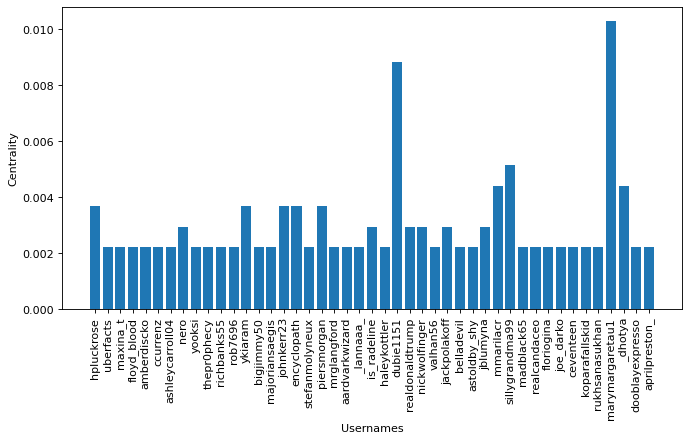

In [33]:
## For developed nations
data = nx.degree_centrality(G1)

usernames = []
centrality = []

# finding top influencers in the dataset
for key, value in data.items():
  if value>0.002: # setting the threshold to avoid cluttering
    # Checking if the user is verified
    if sum(eng_df[eng_df['username'] == key]['userVerified']):
      key += " (verified)"
    usernames.append(key)
    centrality.append(value)

# printing the usernames of top influencers
print(usernames)

# drawing the graph
figure(figsize=(10,5), dpi=80)
plt.bar(range(len(usernames)), centrality, tick_label=usernames)
plt.xticks(rotation='vertical')
plt.xlabel('Usernames')
plt.ylabel('Centrality')
plt.show()

As we can see, the usernames 'marymargaretau1' and 'dubie1151' are the top influencers in the developed nations' dataset who are related to the gender issues. Unsurpirsingly, Donald Trump ('realdonaldtrump') is also in the chart as has been involved in the gender controversies multiple times.

Also, there are no verified accounts that are top influencers of gender debate in the developed nations.



---



['nilimajumder', 'mahmoud_metoo', 'un_women', 'afromatriarch', 'ybsnroh', 'thisuriw', 'dakki_16', 'tweetsbytobi', 'tarywacho', 'amzodo', 'kamlesm', 'c___square', 'sameeraroraedu', 'republic', 'rupasubramanya (verified)', 'ajie_mandiri', 'harryrockerz', 'x_minpswook_x', 'thatgirlwriter', 'spartakussug', 'hussainjahanzeb', 'eseosa_sahon', 'naukarichoddi', 'sahajj16', 'lloydchimanga', 'javedhassan (verified)', 'akshayalladi', 'ayuel_m', 'bloodli_', 'nefisa78323709', 'askanshul', 'rafaellainette', 'womenhonour', 'women_honour']


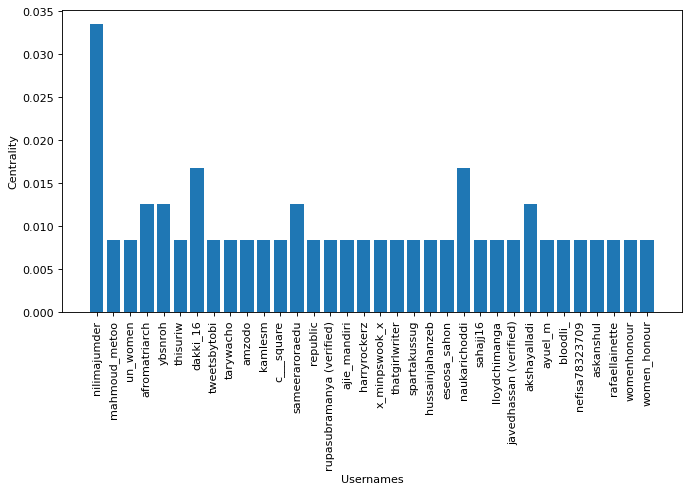

In [34]:
## For developing nations
data = nx.degree_centrality(G2)

usernames = []
centrality = []

# finding top influencers in the dataset
for key, value in data.items():
  if value>0.005: # setting the threshold to avoid cluttering
    # Checking if the user is verified
    if sum(eng_df[eng_df['username'] == key]['userVerified']):
      key += " (verified)"
    usernames.append(key)
    centrality.append(value)

# printing the usernames of top influencers
print(usernames)

# drawing the graph
figure(figsize=(10,5), dpi=80)
plt.bar(range(len(usernames)), centrality, tick_label=usernames)
plt.xticks(rotation='vertical')
plt.xlabel('Usernames')
plt.ylabel('Centrality')
plt.show()

In the developing nations 'nilimajumder' and 'dakki_16' are the top influencers of gender debate. However, we can see one verified account i.e Rupa Subramanya(rupasubramanya) in the top influencers list.